<a href="https://colab.research.google.com/github/PedrovModa/An-lise_e_visualiza-o_de_dados/blob/main/Projeto_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns

## **Abrir base de dados**

In [ ]:
dados = pd.read_csv('tips_atualizado.csv')

In [ ]:
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


# **Traduzir Colunas**

In [ ]:
coluna = {'total_bill': 'Valor_Total_Conta', 'tip': 'Gorjeta', 'dessert': 'Sobremesa', 'day':'Dia_da_Semana', 'time': 'Hora_do_Dia', 'size': 'Total_de_Pessoas'}
dados = dados.rename(columns = coluna)

In [ ]:
dados

,Valor_Total_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


# **Traduzir conteúdos colunas**

In [ ]:
filtro_sobremesa = {'No': 'Não', 'Yes': 'Sim'}
dados.replace(filtro_sobremesa, inplace = True)

In [ ]:
dados['Dia_da_Semana'].unique()

filtro_dias_semana = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta-Feira', 'Fri': 'Sexta-Feira'}
dados.replace(filtro_dias_semana, inplace = True)

In [ ]:
filtro_hora_dia = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}
dados.replace(filtro_hora_dia, inplace = True)

# **Criando coluna Porcentagem**

In [ ]:
dados['Porcentagem'] = (dados['Gorjeta'] / dados['Valor_Total_Conta']).round(2)

In [ ]:
dados

,Valor_Total_Conta,Gorjeta,Sobremesa,Dia_da_Semana,Hora_do_Dia,Total_de_Pessoas,Porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,0.06
1,10.340000,1.660000,Não,Domingo,Jantar,3,0.16
2,21.010000,3.500000,Não,Domingo,Jantar,3,0.17
3,23.680000,3.310000,Não,Domingo,Jantar,2,0.14
4,24.590000,3.610000,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3,0.18
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06
3413,21.547132,1.733914,Sim,Sábado,Jantar,2,0.08
3414,18.966233,1.718951,Não,Sábado,Jantar,2,0.09


# **Verificar se gorjeta aumenta de acordo com valor total da conta**

### **Gráfico Scatter**

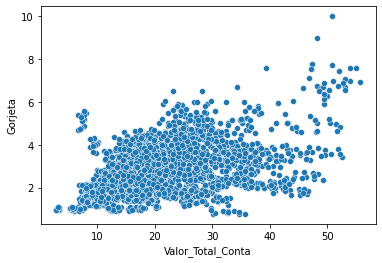

In [ ]:
sns.scatterplot(x = 'Valor_Total_Conta', y = 'Gorjeta', data = dados)

### **Gráfico relplot**

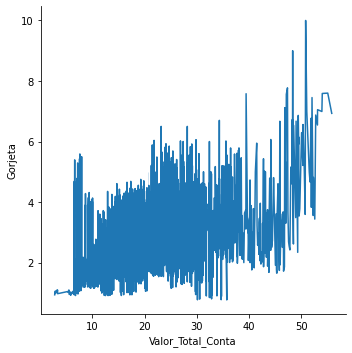

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', data = dados, kind = 'line')

### **Gráfico lmplot (linha de proporção)**

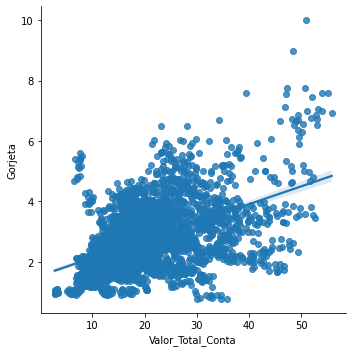

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Gorjeta', data = dados)

***Aparentemente, o valor da gorjeta aumenta de acordo com o valor da conta... vamos verificar se existe uma proporção de quanto maior o valor da conta, maior a porcentagem de gorjeta.***

# **Ver se a proporção da gorjeta aumenta de acordo com o valor total da conta**

### **Gráfico relplot**

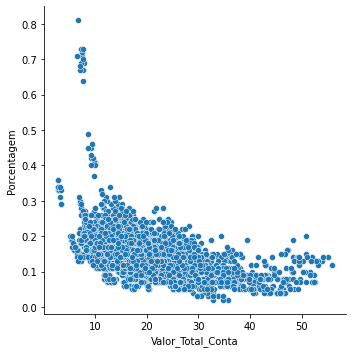

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', data = dados)

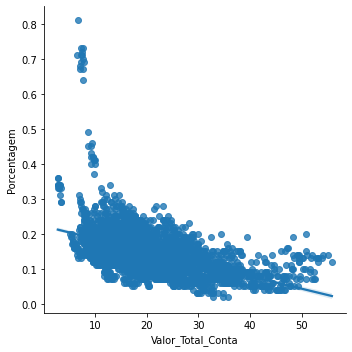

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Porcentagem', data = dados)

***Aparentemente, o valor da gorjeta pode até aumentar de acordo com o valor da conta como visto 2 gráficos acima, entretanto, o valor da gorjeta não é proporcional ao valor total da conta.***

# **Ver se a gorjeta aumenta de acordo com o pedido de sobremesa**

### **Gráfico categórico.**

##### ***Verificando o quem são as pessoas que solicitaram sobremesa e não solicitaram***

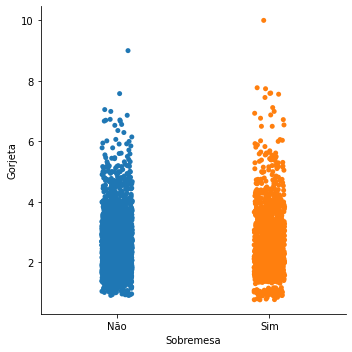

In [ ]:
sns.catplot(x = 'Sobremesa', y = 'Gorjeta', data = dados)

### **Gráfico relplot**

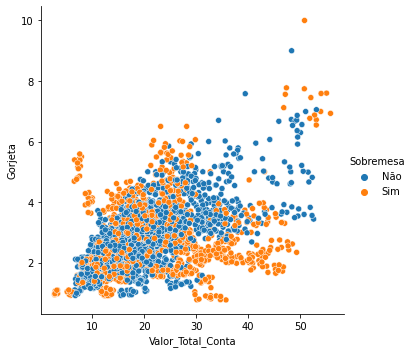

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Sobremesa', data = dados)

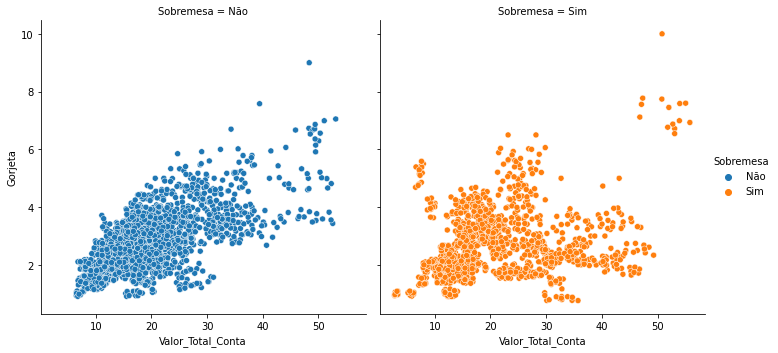

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = dados)

### **Gráfico lmplot**

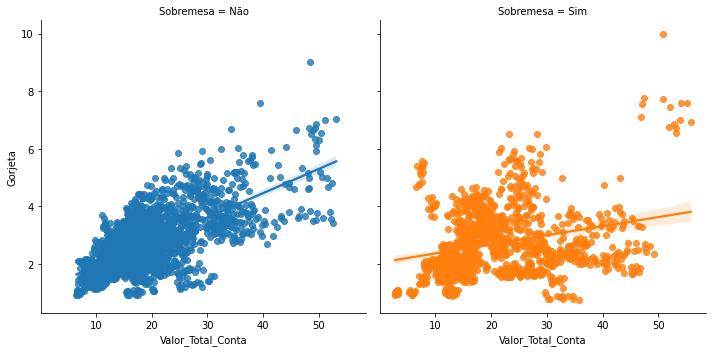

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Sobremesa', col = 'Sobremesa', data = dados)

***Aparentemente aqueles pedidos que não solicitaram sobremesa, parecem dar mais gorjeta do que aqueles que solicitaram sobremesa.***

# **Ver se a proporçao de gorjeta aumenta de acordo com o pedido de sobremesa**

In [ ]:
dados[dados['Sobremesa']== 'Sim'].describe()


,Valor_Total_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [ ]:
dados[dados['Sobremesa']== 'Não'].describe()

,Valor_Total_Conta,Gorjeta,Total_de_Pessoas,Porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


### **Gráfico relplot**

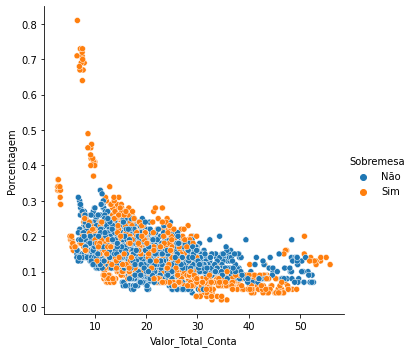

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Sobremesa', data = dados)

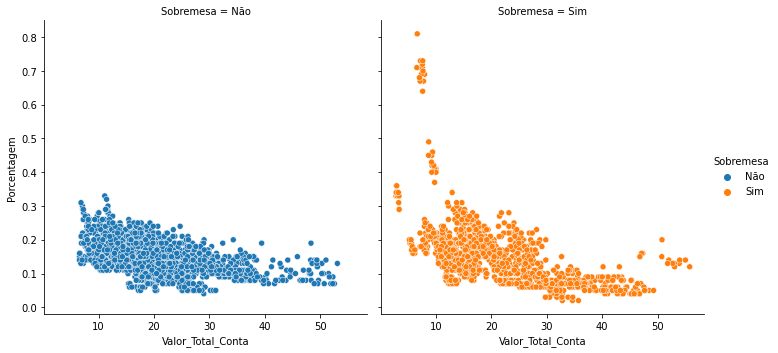

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Sobremesa', col = 'Sobremesa', data = dados)

### **Gráfico lmplot**

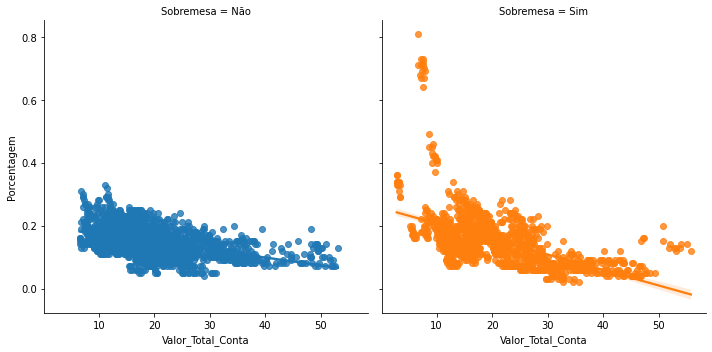

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Sobremesa', col = 'Sobremesa', data = dados)

***Visualmente, parece que existe uma diferença na gorjeta dependendo se a sobremesa é pedida ou não.***

###***Teste de hipótese...***

###***Hipótese nula = Pressupõe que a distribuição de gorjetas é igual nos dois grupos***

###***Hipótese alternativa = Pressupõe que a distribuição de gorjetas não é igual nos dois grupos***

In [ ]:
sobremesa_sim = dados.query("Sobremesa == 'Sim'").Porcentagem
sobremesa_nao = dados.query("Sobremesa == 'Não'").Porcentagem

In [ ]:
from scipy.stats import ranksums

In [ ]:
r1 = ranksums(sobremesa_sim, sobremesa_nao)

In [ ]:
print('O valor p-value é de {}'.format(r1.pvalue))

O valor p-value é de 0.033144013617673405


***Podemos afirmar que a distribuição de gorjetas não é igual nos dois grupos.***

# **Ver se o valor de gorjeta aumenta de acordo com o dia da semana**

### **Gráfico categórico**

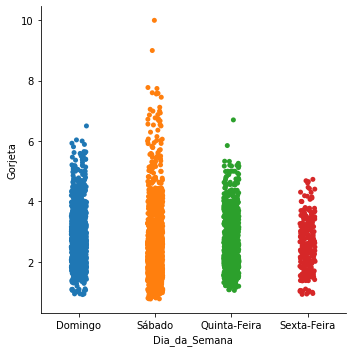

In [ ]:
sns.catplot(x = 'Dia_da_Semana', y = 'Gorjeta', data = dados)

### **Gráfico relplot**

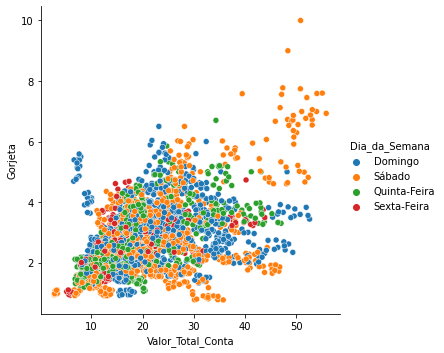

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana', data = dados)

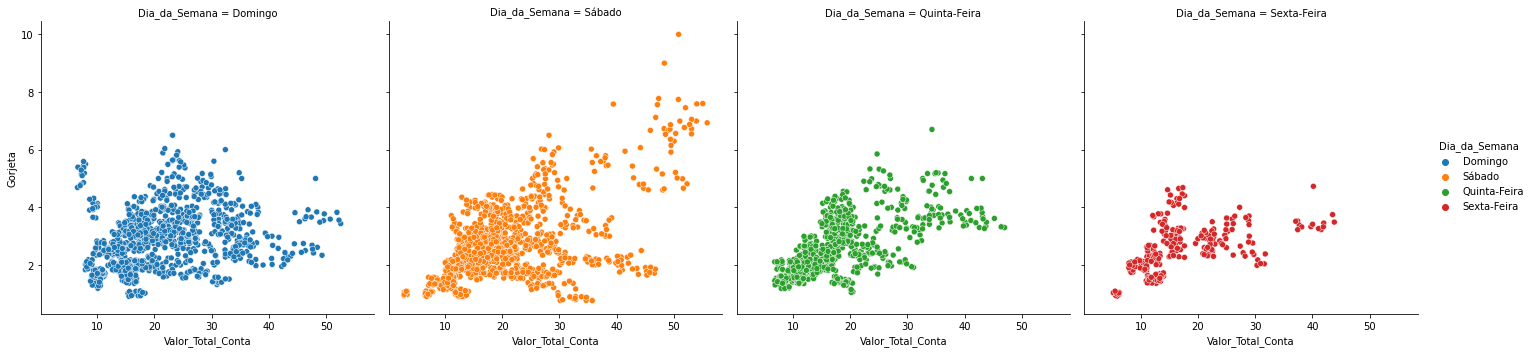

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana',col = 'Dia_da_Semana', data = dados)

### **Gráfico lmplot**

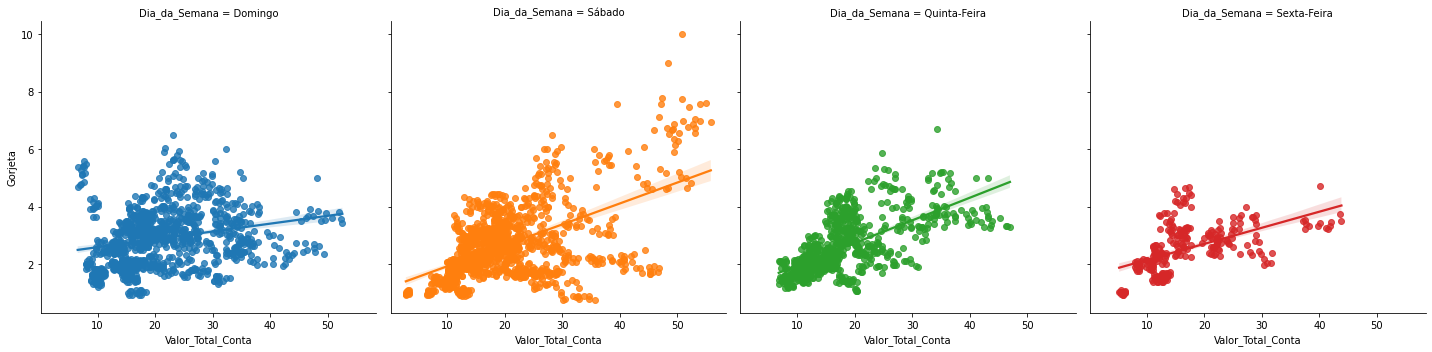

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Dia_da_Semana',col = 'Dia_da_Semana', data = dados)

***Visualmente, notamos um maior valor de gorjeta no sábado e quinta-feira, vamos verificar se isso é de fato verdade.***

# **Ver se a proporção da gorjeta aumenta de acordo com o dia da semana**

### **Gráfico relplot**

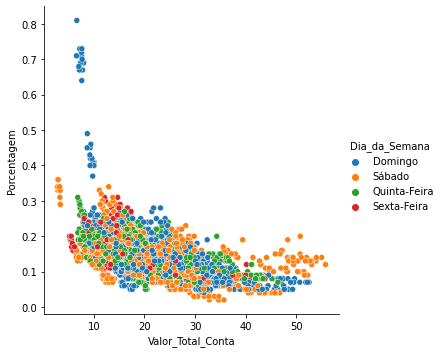

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana', data = dados)

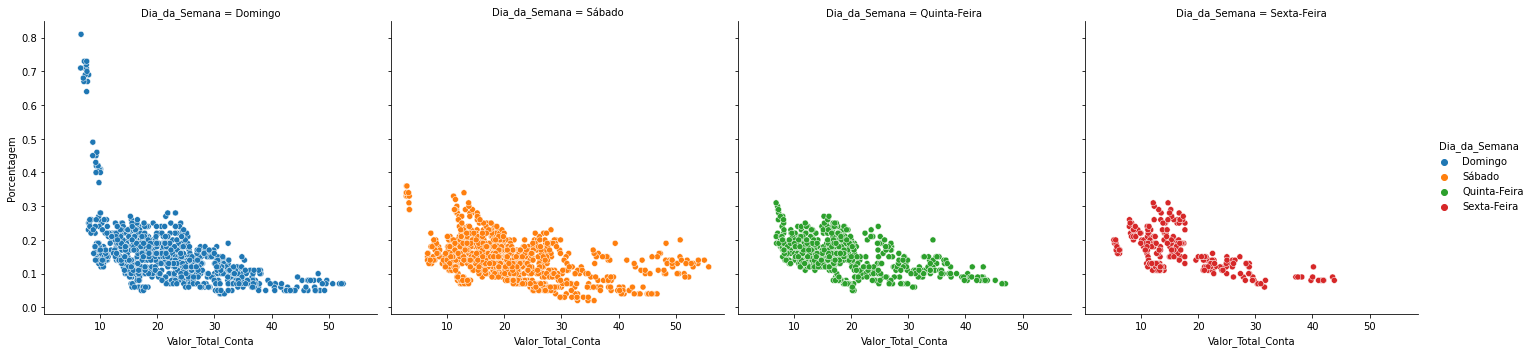

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana',col= 'Dia_da_Semana', data = dados)

### **Gráfico lmplot**

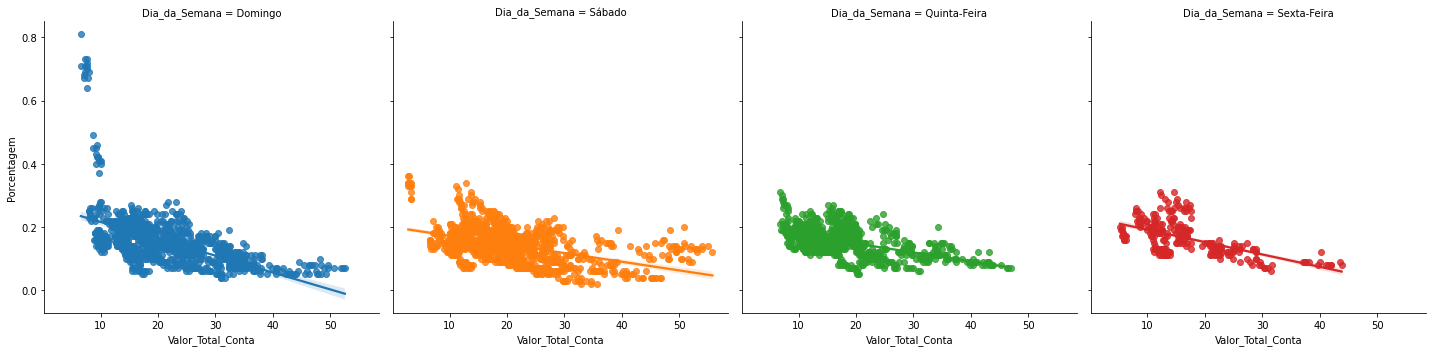

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Dia_da_Semana',col= 'Dia_da_Semana', data = dados)

###***Teste de hipótese...***

###***Hipótese nula = Pressupõe que a distribuição de gorjetas é igual em todos os dias***

###***Hipótese alternativa = Pressupõe que a distribuição de gorjetas não é igual em todos os dias***

In [ ]:
dados.groupby(['Dia_da_Semana']).mean()[['Valor_Total_Conta', 'Gorjeta', 'Porcentagem']].round(3)

,Valor_Total_Conta,Gorjeta,Porcentagem
Dia_da_Semana,,,
Domingo,21.439,2.902,0.155
Quinta-Feira,17.724,2.556,0.154
Sexta-Feira,17.216,2.550,0.163
Sábado,20.480,2.690,0.144


In [ ]:
dados['Dia_da_Semana'].value_counts()

Sábado          1218
Domingo         1064
Quinta-Feira     868
Sexta-Feira      266
Name: Dia_da_Semana, dtype: int64

In [ ]:
media_geral_gorjetas = dados['Gorjeta'].mean()

In [ ]:
print('A média total de Gorjetas é: {:.2f}'.format(media_geral_gorjetas))

A média total de Gorjetas é: 2.71


**Devido a sábado e domingo serem os dois dias com médias maiores no quesito gorjeta e também frequência, vamos analisar esses dois dias**

In [ ]:
query_sabado = dados.query("Dia_da_Semana == 'Sábado'").Porcentagem
query_domingo = dados.query("Dia_da_Semana == 'Domingo'").Porcentagem

In [ ]:
r2 = ranksums(query_sabado, query_domingo)
r2

RanksumsResult(statistic=-1.5327282679281065, pvalue=0.1253428211744031)

In [ ]:
print('O valor de p-value é de: {:.4f}'.format(r2.pvalue))

O valor de p-value é de: 0.1253


***Devido ao valor de p-value ser maior que 0.05 , podemos afirmar que a distribuição de gorjetas é igual em no sábado e no domingo.***

# **Verificar se o valor da gorjeta aumenta de acordo com a hora do dia**

### **Gráfico categórico**

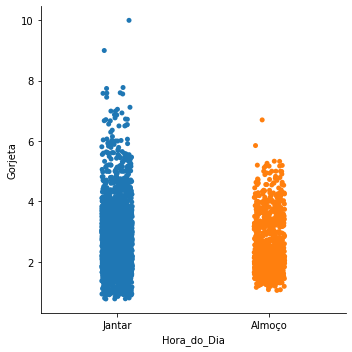

In [ ]:
sns.catplot(x = 'Hora_do_Dia', y = 'Gorjeta', data = dados)

### **Gráfico relplot**

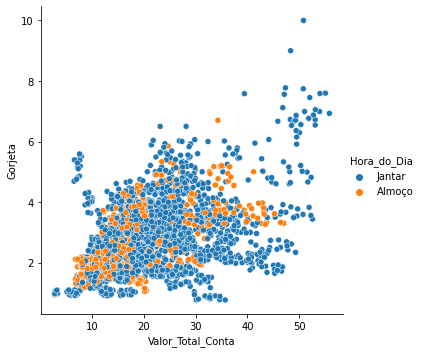

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Hora_do_Dia', data = dados)

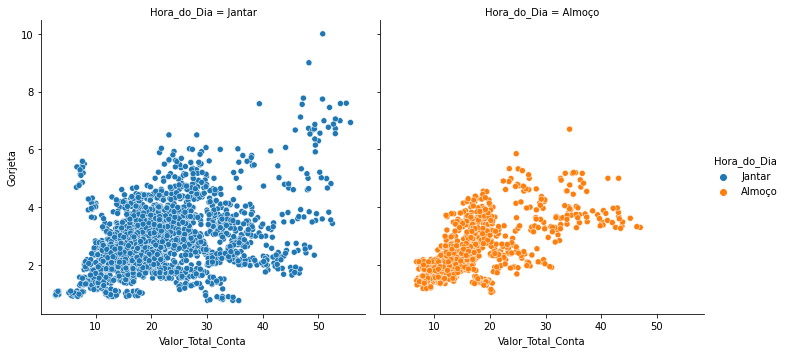

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Hora_do_Dia',col = 'Hora_do_Dia', data = dados)

### **Gráfico lmplot**

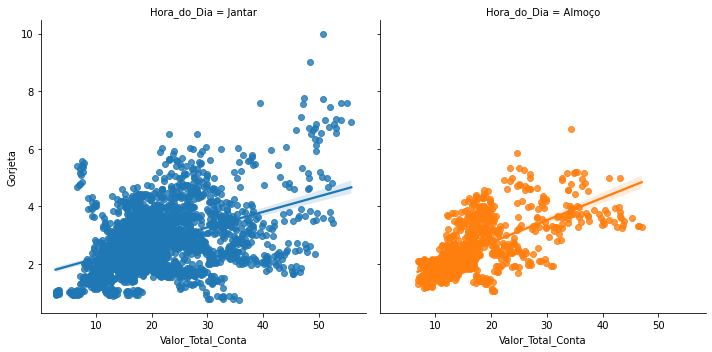

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Gorjeta', hue = 'Hora_do_Dia',col = 'Hora_do_Dia', data = dados)

***Podemos verificar que existem um número maior de pessoas que jantaram e que o valor de gorjeta aparenta ser maior para esse grupo***

# **Verificar se a proporção da gorjeta aumenta de acordo com a hora do dia**

### **Gráfico relplot**

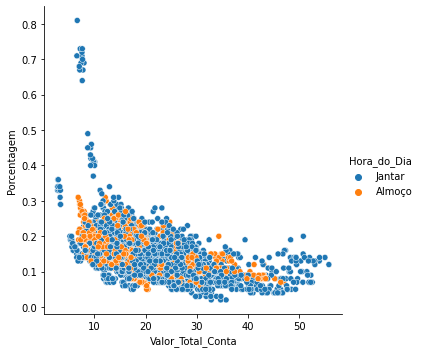

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Hora_do_Dia', data = dados)

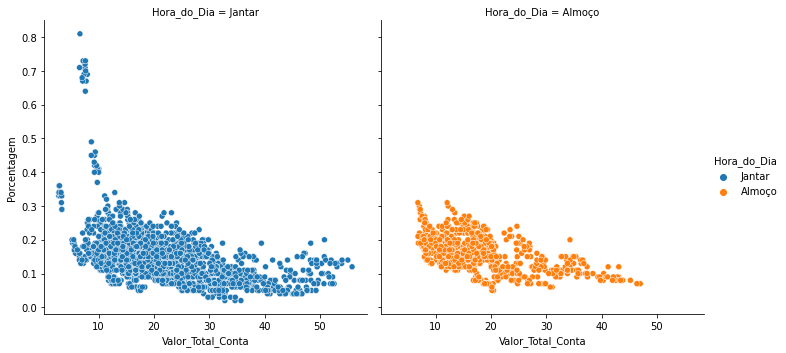

In [ ]:
sns.relplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Hora_do_Dia',col = 'Hora_do_Dia', data = dados)

### **Gráfico lmplot**

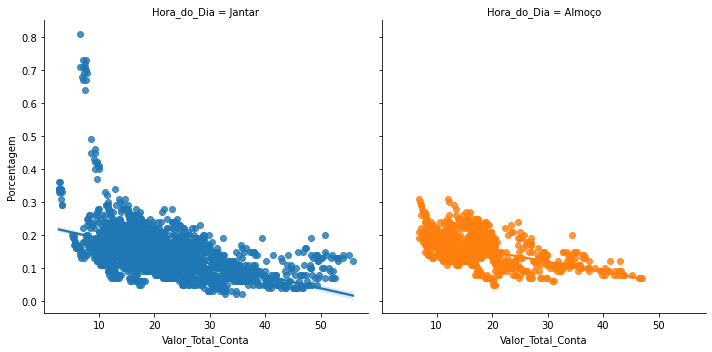

In [ ]:
sns.lmplot(x = 'Valor_Total_Conta', y = 'Porcentagem', hue = 'Hora_do_Dia',col = 'Hora_do_Dia', data = dados)

###***Teste de hipótese...***

###***Hipótese nula = Pressupõe que a distribuição de gorjetas é igual no almoço e no jantar. ***

###***Hipótese alternativa = Pressupõe que a distribuição de gorjetas não é igual no almoço e no jantar.***

In [ ]:
dados.groupby(['Hora_do_Dia']).mean()[['Valor_Total_Conta', 'Gorjeta', 'Porcentagem']].round(3)

,Valor_Total_Conta,Gorjeta,Porcentagem
Hora_do_Dia,,,
Almoço,17.214,2.534,0.158
Jantar,20.833,2.779,0.149


In [ ]:
dados['Hora_do_Dia'].value_counts()

Jantar    2464
Almoço     952
Name: Hora_do_Dia, dtype: int64

In [ ]:
query_almoco = dados.query("Hora_do_Dia == 'Almoço'").Porcentagem
query_jantar = dados.query("Hora_do_Dia == 'Jantar'").Porcentagem

In [ ]:
r3 = ranksums(query_almoco, query_jantar)
r3

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

In [ ]:
print('O valor de p-value é de: {}'.format(r3.pvalue))

O valor de p-value é de: 1.3785725618355523e-11


***Devido ao valor de p-value ser maior que 0.05 , podemos afirmar que a distribuição de gorjetas é igual no almoço e no jantar.***